In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing the hand written digit dataset
from sklearn import datasets

# digit contain the dataset
digits = datasets.load_digits()

# dir function use to display the attributes of the dataset
dir(digits)


['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
# outputting the picture value as a series of numbers
print(digits.images[0])


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [4]:
# importing the matplotlib libraries pyplot function
import matplotlib.pyplot as plt
# defining the function plot_multi

def plot_multi(i):
    nplots = 16
    fig = plt.figure(figsize=(15, 15))
    for j in range(nplots):
        plt.subplot(4, 4, j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    # printing the each digits in the dataset.
    plt.show()

    plot_multi(0)
    


In [6]:
# converting the 2 dimensional array to one dimensional array
y = digits.target
x = digits.images.reshape((len(digits.images), -1))

# gives the  shape of the data
x.shape


(1797, 64)

In [7]:
# printing the one-dimensional array's values
x[0]


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
# Very first 1000 photographs and
# labels will be used in training.
x_train = x[:1000]
y_train = y[:1000]

# The leftover dataset will be utilised to
# test the network's performance later on.
x_test = x[1000:]
y_test = y[1000:]


In [9]:
# importing the MLP classifier from sklearn
from sklearn.neural_network import MLPClassifier

# calling the MLP classifier with specific parameters
mlp = MLPClassifier(hidden_layer_sizes=(15,),
                    activation='logistic',
                    alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=1,
                    learning_rate_init=.1,
                    verbose=True)


In [10]:
mlp.fit(x_train, y_train)


Iteration 1, loss = 2.22958289
Iteration 2, loss = 1.91207743
Iteration 3, loss = 1.62507727
Iteration 4, loss = 1.32649842
Iteration 5, loss = 1.06100535
Iteration 6, loss = 0.83995513
Iteration 7, loss = 0.67806075
Iteration 8, loss = 0.55175832
Iteration 9, loss = 0.45840445
Iteration 10, loss = 0.39149735
Iteration 11, loss = 0.33676351
Iteration 12, loss = 0.29059880
Iteration 13, loss = 0.25437208
Iteration 14, loss = 0.22838372
Iteration 15, loss = 0.20200554
Iteration 16, loss = 0.18186565
Iteration 17, loss = 0.16461183
Iteration 18, loss = 0.14990228
Iteration 19, loss = 0.13892154
Iteration 20, loss = 0.12833784
Iteration 21, loss = 0.12138920
Iteration 22, loss = 0.11407971
Iteration 23, loss = 0.10677664
Iteration 24, loss = 0.10037149
Iteration 25, loss = 0.09593187
Iteration 26, loss = 0.09250135
Iteration 27, loss = 0.08676698
Iteration 28, loss = 0.08356043
Iteration 29, loss = 0.08209789
Iteration 30, loss = 0.07649168
Iteration 31, loss = 0.07410898
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, random_state=1, solver='sgd',
              verbose=True)

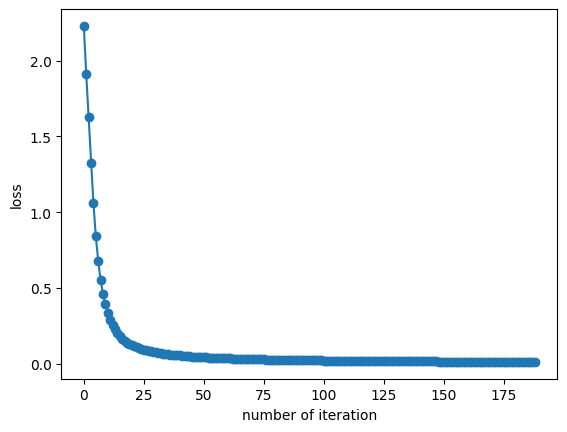

In [11]:
fig, axes = plt.subplots(1, 1)
axes.plot(mlp.loss_curve_, 'o-')
axes.set_xlabel("number of iteration")
axes.set_ylabel("loss")
plt.show()


In [12]:
predictions = mlp.predict(x_test)
predictions[:50]


array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 5, 0])

In [13]:
y_test[:50]


array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

In [14]:
# importing the accuracy_score from the sklearn
from sklearn.metrics import accuracy_score

# calculating the accuracy with y_test and predictions
accuracy_score(y_test, predictions)


0.9146800501882058